# Percursos em Grafos
## Busca em Profundidade (DFS, do inglês *Depth First Search*)
*Universidade Federal de Lavras  
Departamento de Ciência da Computação  
GCC218 - Algoritmos em Grafos  
Professor: Mayron Moreira*

## DFS

Considere um grafo $G=(V,E)$ não-ponderado qualquer e a seguinte tarefa: determinar se o grafo possui um ciclo ou não.

### Definição do problema

* **Problema da Existência de um Ciclo**
    * **Instância**: um grafo não ponderado qualquer.  
    * **Saída**: **True**, se o grafo possui ao menos um ciclo; **False**, caso contrário.
    
Esse problema pode ser resolvido através do Algoritmo de Busca em Profundidade, comumente referenciado por DFS (devido as suas iniciais em inglês). A DFS explora o nível mais profundo de uma ramificação do grafo, até que não seja possível mais avançar nessa direção. Quando isso ocorre, o algoritmo volta em um processo de *backtracking* e explora outra possibilidade, proveniente de um ramo distinto. Para tanto, o algoritmo utilizada a estrutura de dados **pilha**. Vejamos um exemplo de implementação da DFS.

### Grafo de teste

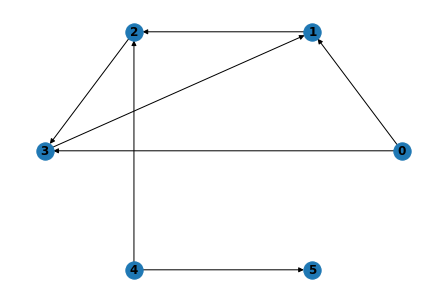

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
n = 6 # Número de vértices do grafo exemplo

# Adicionando os vértices em G
for i in range(n):
    G.add_node(i)

# Acrescentando suas arestas
G.add_edge(0, 1)
G.add_edge(0, 3)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(4, 2)
G.add_edge(4, 5)

# Desenho de G
pos=nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')
plt.show()

### Algoritmo

In [2]:
# Nosso infinito
INFINITO = 100000

'''
As cores identificarao de o vertice foi ou nao visitado.
Notacao:
B - vertice ainda nao descoberto (Branco)
C - vertice descoberto
P - vertice que ja fora visitado (Preto)
''' 
cor = ['B' for i in range(n)]

# Pai de cada vertice na DFS
pai = [-1 for i in range(n)]

# Tempo de descoberta do vertice na DFS
desc = [INFINITO for i in range(n)]

# Tempo de fechamento do vertice na DFS
fech = [INFINITO for i in range(n)]

# Tempo atual
t_atual = 0

'''
Parametros:
grafo - corresponde a uma estrutura de dados em grafo
s - vertice de origem
'''
def DFS_VISIT(grafo, s):
    global t_atual
    # Inicializando o vertice origem
    desc[s] = t_atual
    cor[s] = 'C'
    t_atual = t_atual + 1
    
    vizinhos = obtemVizinhos(grafo, s)
    
    for v in vizinhos:
        if(cor[v] == 'B'):
            print("(", s, ",", v, ") eh aresta de arvore")
            cor[v] = 'C'
            pai[v] = s
            DFS_VISIT(grafo, v)
                        
    cor[s] = 'P'
    t_atual = t_atual + 1
    fech[s] = t_atual

def DFS(grafo):
    for u in range(n):
        if(cor[u] == 'B'):
            DFS_VISIT(grafo, u)
            
# Considerando grafo como uma lista de adjacencia
def obtemVizinhos(grafo, u):
    return grafo[u]

Tomando uma matriz de adjacência para representar $G=(V,E)$, com $|V|=n$ e $|E|=m$, vemos que a implementação acima gasta $O(n) + O(m) = O(n+m)$, em que $O(n)$ corresponde à inicialização das estruturas auxiliares do algoritmo (*"cor", "desc", "fec" e "pai"*), e $O(m)$ vem do pior caso de termos um grafo não-orientado e conexo, pois:  

* note que um vértice branco só muda de cor para cinza e preto exatamente uma vez (se for alcançável, claro).   
* Logo, teremos o total de arestas visitadas igual a $\sum_{v \in V} d(v)$, em que $d(v)$ é o grau de cada vértice.   
* Pelo Teorema do Aperto de Mãos, $\sum_{v \in V} d(v) = 2m \in O(m)$.  

#### Testando

In [3]:
# Arestas de G
E = G.edges()

# Lista de adjacencia de G
listaAdj = [[] for i in range(n)]
for e in E:
    listaAdj[e[0]].append(e[1])
    
DFS(listaAdj)

( 0 , 1 ) eh aresta de arvore
( 1 , 2 ) eh aresta de arvore
( 2 , 3 ) eh aresta de arvore
( 4 , 5 ) eh aresta de arvore


Imprimindo a árvore (ou floresta, se for o caso) em profundidade:

1   0
2   1
3   2
5   4


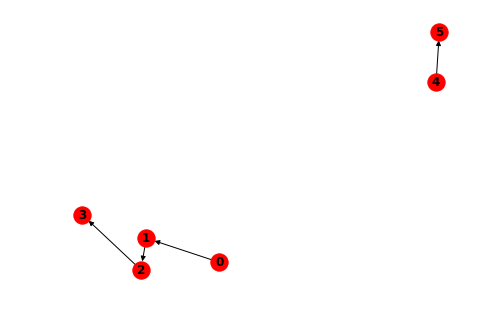

In [4]:
# Resposta da DFS
G1 = nx.DiGraph()
for i in range(n):
    G1.add_node(i)

# Acrescentando a arvore em largura
for i in range(n):
    if(pai[i] != -1):
        print(i, " ", pai[i])
        G1.add_edge(pai[i], i)
        
# Desenho de G1
nx.draw(G1, with_labels=True, font_weight='bold')
plt.show()

Mas ainda não respondemos a pergunta: como definir que um grafo tem algum ciclo? Basta testarmos se $G$ possui uma aresta (ou arco, se for o caso) de retorno. Assim, na função *DFS_VISIT*, devemos verificar se um vértice **cinza** aponta para outro vértice vizinho **cinza**.

In [5]:
# Inicializando as estruturas novamente
cor = ['B' for i in range(n)]

# Pai de cada vertice na DFS
pai = [-1 for i in range(n)]

# Tempo de descoberta do vertice na DFS
desc = [INFINITO for i in range(n)]

# Tempo de fechamento do vertice na DFS
fech = [INFINITO for i in range(n)]

# Tempo atual
t_atual = 0

# Variavel que indica a continuidade da DFS
continua = True

'''
Parametros:
grafo - corresponde a uma estrutura de dados em grafo
s - vertice de origem
'''
def DFS_VISIT_DETEC_CICLO(grafo, s):
    global t_atual
    global continua
    
    if(continua):
        # Inicializando o vertice origem
        desc[s] = t_atual
        cor[s] = 'C'
        t_atual = t_atual + 1

        vizinhos = obtemVizinhos(grafo, s)

        for v in vizinhos:
            if(cor[v] == 'B'):
                print("(", s, ",", v, ") eh aresta de arvore")
                cor[v] = 'C'
                pai[v] = s
                DFS_VISIT_DETEC_CICLO(grafo, v)

            elif(cor[v] == 'C'):
                print("(", s, ",", v, ") eh aresta de retorno")
                print("O grafo tem um ciclo")
                continua = False

        cor[s] = 'P'
        t_atual = t_atual + 1
        fech[s] = t_atual

def DFS_DETEC_CICLO(grafo):
    for u in range(n):
        if(cor[u] == 'B' and continua):
            DFS_VISIT_DETEC_CICLO(grafo, u)

#### Testando

In [6]:
DFS_DETEC_CICLO(listaAdj)

( 0 , 1 ) eh aresta de arvore
( 1 , 2 ) eh aresta de arvore
( 2 , 3 ) eh aresta de arvore
( 3 , 1 ) eh aresta de retorno
O grafo tem um ciclo


### Exercício

* Qual é a complexidade de encontrar um ciclo, independente do grafo?  

* Implemente uma função, baseada na DFS, que verifica se um grafo não-direcionado e não-ponderado é um **grafo bipartido**.  